In [816]:
# import libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data preprocessing

## Data info

In [817]:
# import the dataset
df = pd.read_csv('netflix_titles.csv')

In [818]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8792,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20-Nov-19,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8793,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,1-Jul-19,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8794,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8795,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Tập dữ liệu gồm có 8807 dòng và 12 cột

In [819]:
# Check Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8797 entries, 0 to 8796
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8797 non-null   object
 1   type          8797 non-null   object
 2   title         8797 non-null   object
 3   director      6173 non-null   object
 4   cast          7972 non-null   object
 5   country       7967 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8797 non-null   int64 
 8   rating        8793 non-null   object
 9   duration      8794 non-null   object
 10  listed_in     8797 non-null   object
 11  description   8797 non-null   object
dtypes: int64(1), object(11)
memory usage: 824.8+ KB


Kiểm tra data type:
- Cột date_added có kiểu dữ liệu là object -> cần chuyển sang datetime

Các cột còn lại đã đảm bảo về kiểu dữ liệu đúng

In [820]:
# Change the type of date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_9972\3083251221.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_added'] = pd.to_datetime(df['date_added'])


## Check duplicated data

In [821]:
# Check duplicate value
df.duplicated().sum()

0

Không có dữ liệu trùng lặp

## Check missing value

In [822]:
# Check Null value
null_values = pd.DataFrame({'Number': df.isnull().sum(), 'Percentage': (df.isnull().sum()/df.shape[0])*100})
null_values

,Number,Percentage
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
director,2624,29.828351
cast,825,9.378197
country,830,9.435035
date_added,0,0.000000
release_year,0,0.000000
rating,4,0.045470
duration,3,0.034103


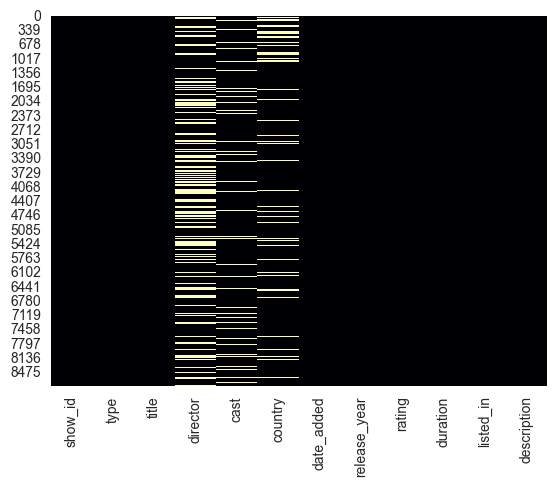

In [823]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False);

Các cột có giá trị null: Director, Cast, Country, rating và duration (Missing completely at random)
Trong đó, cột Director, Cast và Country có % các giá trị Null cao
- Đối với cột Director, Cast và Country, ta sẽ thay thế các giá trị null bằng 'Unknown'
- Đối với hai cột còn lại, ta sẽ kiểm tra xem các giá trị null có ảnh hưởng đến dữ liệu hay không và cân nhắc xóa

In [824]:
# Fill the null value in director, cast and country column
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

Kiểm tra Null value trong cột Duration

In [825]:
# Check Null value in Duration column
df[df.isnull()['duration'] == True]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


Khi quan sát tập dữ liệu, đặc biệt là hai cột rating và duration, có thể thấy, việc các giá trị Null xuất hiện trong cột Duration là do lỗi nhập dữ liệu, các giá trị cột rating chính là giá trị ở cột duration. Vì vậy, chúng ta sẽ chuyển các giá trị ở cột rating sang cột duration

In [826]:
index = list(df[df.isnull()['duration'] == True].index)
df.loc[index, 'duration'] = df.loc[index, 'rating']
df.loc[index,'rating'] = np.nan
df.loc[index,:]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...


Tiếp đó, kiểm tra giá trị Null trong Rating

In [827]:
df[df.isnull()['rating'] == True]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,Unknown,"Oprah Winfrey, Ava DuVernay",Unknown,2017-01-26,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6823,s6828,TV Show,Gargantia on the Verdurous Planet,Unknown,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7305,s7313,TV Show,Little Lunch,Unknown,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7529,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


Đối với cột rating, ta thấy đây là các giá trị bị thiếu hoàn toàn ngẫu nhiên, vì vậy ta sẽ điền các giá trị này bằng giá trị mode của cột rating.

In [828]:
# Fill the null value in rating with mode
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [829]:
# check null value in the dataset again
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Check numerical and categorical data

In [830]:
# Describe numerical data
df.describe()

,date_added,release_year
count,8797,8797.000000
mean,2019-05-17 05:59:08.436966912,2014.183472
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-02 00:00:00,2017.000000
75%,2020-08-19 00:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.822191


In [831]:
# Check categorical data
df['type'].value_counts()

type
Movie      6131
TV Show    2666
Name: count, dtype: int64

In [832]:
df['rating'].value_counts()

rating
TV-MA       3212
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

Các cột Cast, Country, Director, Listed_in có các dữ liệu được hợp nhất trong một ô. Tùy vào mục tiêu nghiên cứu và phân tích, chúng ta sẽ có hướng xử lý đối với các cột này

# EDA

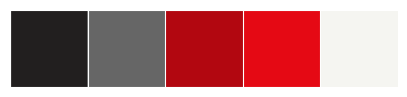

In [833]:
sns.palplot(['#221f1f','#666666' ,'#b20710', '#e50914','#f5f5f1'])
custom_colors = ['#221f1f', '#666666', '#b20710', '#e50914','#f5f5f1']

## Feature Characteristics

### Numerical data

##### Release year

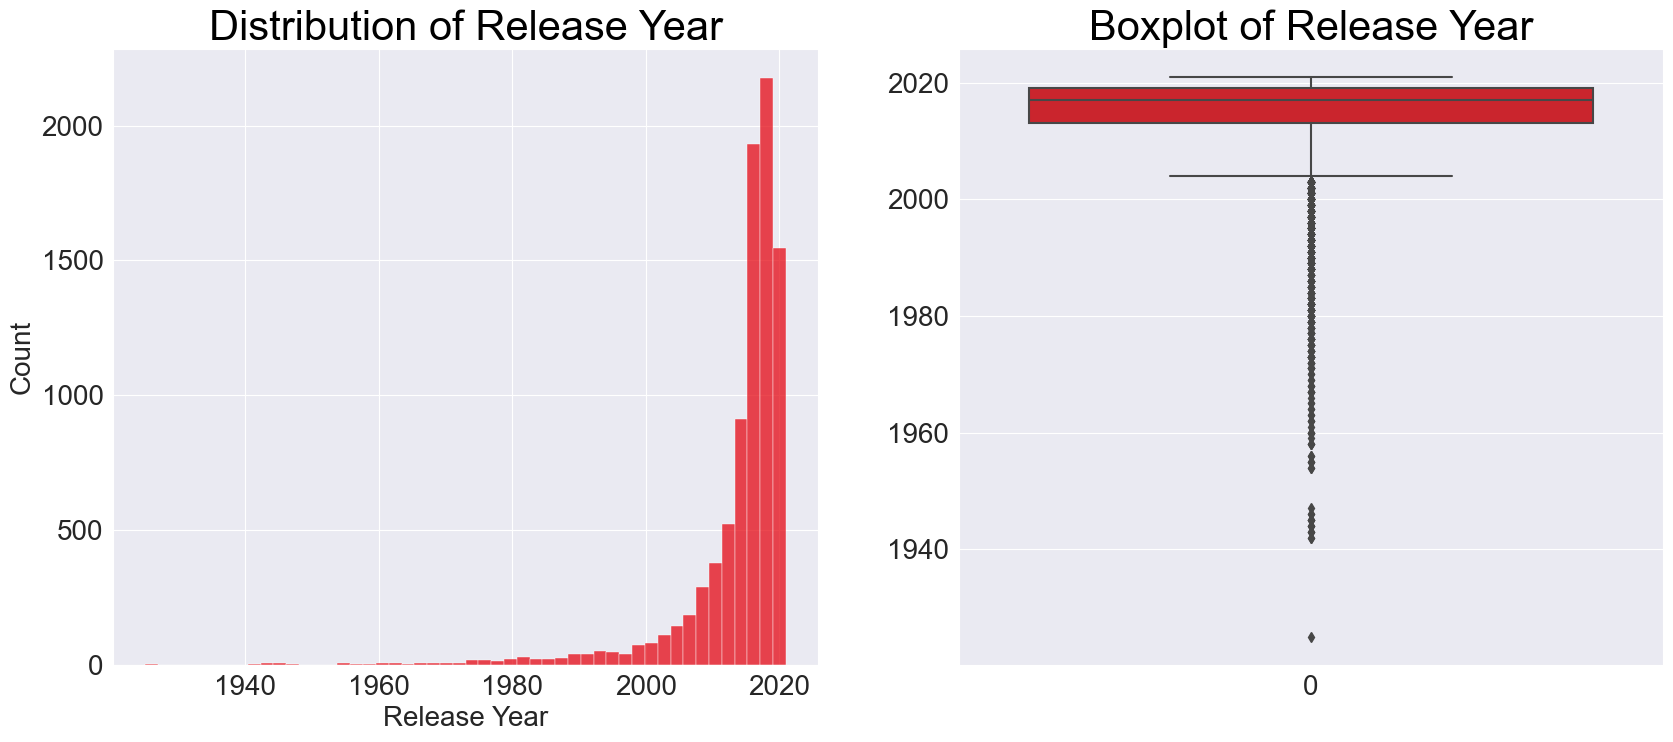

In [834]:
fig, ax = plt.subplots(nrows=1,ncols=2)
sns.histplot(df.release_year, ax=ax[0], bins=50, color=custom_colors[3])
sns.boxplot(df.release_year, ax=ax[1], color=custom_colors[3])
fig.set_size_inches(20,8)

ax[0].set_title('Distribution of Release Year', fontsize=30)
ax[1].set_title('Boxplot of Release Year', fontsize=30)

ax[0].set_xlabel('Release Year', fontsize=20)
ax[0].set_ylabel('Count', fontsize=20)
ax[0].tick_params(axis='x', labelsize=20)
ax[0].tick_params(axis='y', labelsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

- Có thể thấy từ năm 2000 trở đi, số lượng phim được phát hành tăng gần như theo cấp số nhân, đạt đỉnh vào năm 2018 và giảm dần vào năm 2020
- Có một số lượng nhỏ các phim và chương trình được phát hành trong giai đoạn 1940-1990, đây là thời kỳ phát triển ban đầu của phim và các chương trình tại Mỹ


#### date_added

Đối với cột date_added, ta có thể mở rộng phân tích bằng cách thêm các cột year_added, month_added, day_added và weekday_added

In [835]:
# Create a new column for the year, month, day and weekday từ cột date_added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day
df['weekday_added'] = df['date_added'].dt.weekday

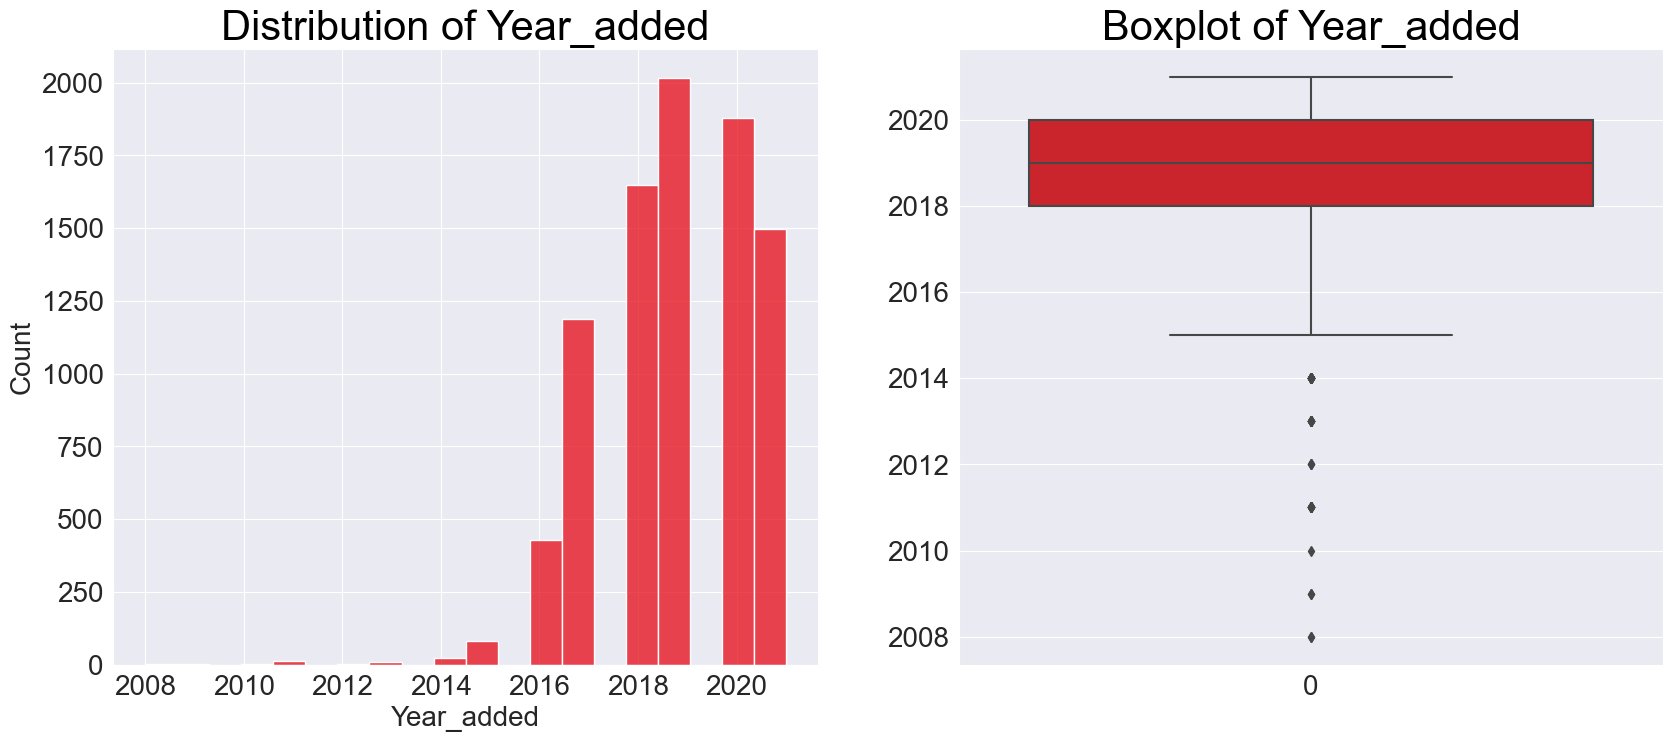

In [836]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,8))

sns.histplot(df.year_added, ax=ax[0], bins=20, color=custom_colors[3])
sns.boxplot(df.year_added, ax=ax[1], color=custom_colors[3])

ax[0].set_title('Distribution of Year_added', fontsize=30)
ax[1].set_title('Boxplot of Year_added', fontsize=30)

ax[0].set_xlabel('Year_added', fontsize=20)
ax[0].set_ylabel('Count', fontsize=20)
ax[0].tick_params(axis='x', labelsize=20)
ax[0].tick_params(axis='y', labelsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

- Netflix.com chính thức được ra mắt vào năm 1998, tuy nhiên, hình thức thời gian đó Netflix chỉ phát hành DVD qua thư tín. 
- Đến năm 2007, Netflix mới chính thức phát hành các chương trình trực tuyến. Điều này lý giải cho sự phân bổ của year_added trong bộ dữ liệu

Tiếp đó, ta sẽ phân tích kỹ hơn về xu hướng phát hành các chương trình của Netflix

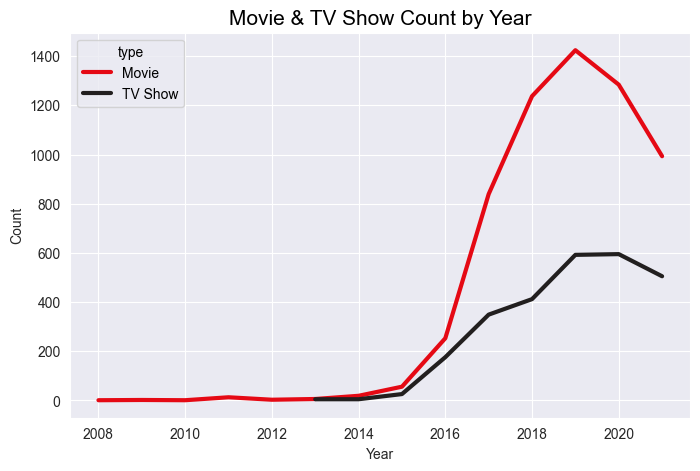

In [837]:
# create line chart show the movie and tv show in each year 
df.groupby('year_added')['type'].value_counts().unstack().plot(kind='line', figsize=(8, 5), linewidth=3, fontsize=10, color=[custom_colors[3], custom_colors[0]])
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Movie & TV Show Count by Year', fontsize=15)
plt.show()

- Các chương trình được chiếu trên Netflix có xu hướng tăng dần qua các năm, tuy nhiên, từ năm 2020 có dấu hiệu giảm (một phần do dữ liệu được thu thập vào tháng 9 năm 2021)
- Trong đó, đặc biệt từ năm 2008 đến 2013, không có chương trình TV-show nào được chiếu trên Netflix

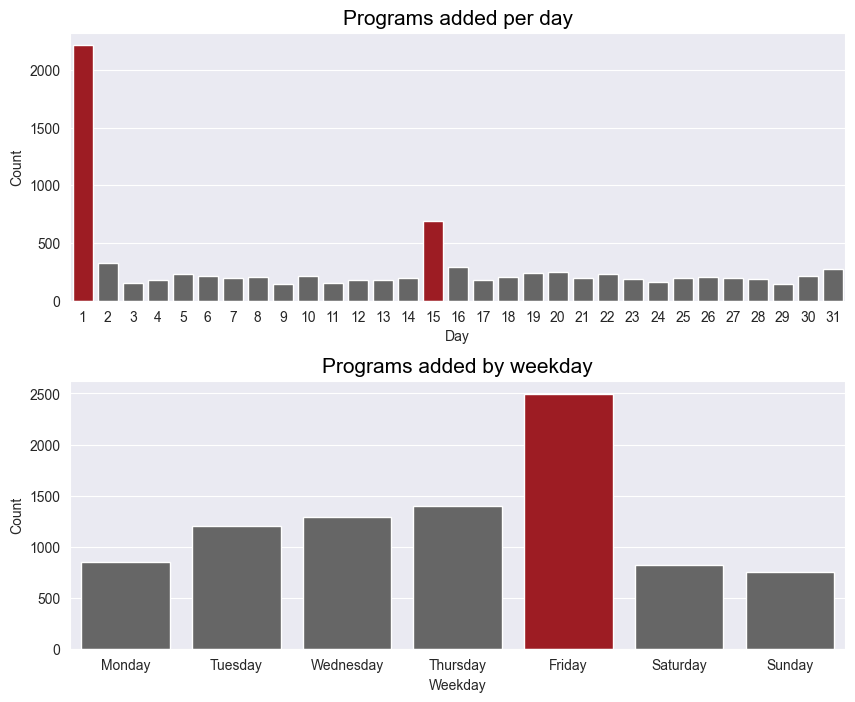

In [838]:
fig, ax = plt.subplots(2,1, figsize=(10,8))
color_map1 = [custom_colors[1] for _ in range(31)]
color_map1[0]= color_map1[14] = custom_colors[2]

color_map2 = [custom_colors[1] for _ in range(7)]
color_map2[4] = custom_colors[2]

# change weekday_added from number to name
df['weekday_added'] = df['weekday_added'].apply(lambda x: 'Monday' if x==0 else x)
df['weekday_added'] = df['weekday_added'].apply(lambda x: 'Tuesday' if x==1 else x)
df['weekday_added'] = df['weekday_added'].apply(lambda x: 'Wednesday' if x==2 else x)
df['weekday_added'] = df['weekday_added'].apply(lambda x: 'Thursday' if x==3 else x)
df['weekday_added'] = df['weekday_added'].apply(lambda x: 'Friday' if x==4 else x)
df['weekday_added'] = df['weekday_added'].apply(lambda x: 'Saturday' if x==5 else x)
df['weekday_added'] = df['weekday_added'].apply(lambda x: 'Sunday' if x==6 else x)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.countplot(data=df, x='day_added', ax=ax[0], palette=color_map1)
sns.countplot(data=df, x='weekday_added', ax=ax[1], palette=color_map2, order=weekday_order)

fig.subplots_adjust(hspace=0.3)

ax[0].set_xlabel('Day', fontsize=10)
ax[0].set_ylabel('Count', fontsize=10)
ax[0].set_title('Programs added per day', fontsize=15)

ax[1].set_xlabel('Weekday', fontsize=10)
ax[1].set_ylabel('Count', fontsize=10)
ax[1].set_title('Programs added by weekday', fontsize=15)

plt.show()

Một số đặc điểm thú vị về xu hướng chiếu các chương trình trên Netflix:

- Các chương trình được phát hành nhiều vào các tháng trong mùa hè, tháng cuối năm (có thể các chương trình ở thời điểm này liên quan đến các lễ hội, kỳ nghỉ lễ, nghỉ hè,...)
- Ngày đầu tháng và giữa tháng là thời điểm có số lượng chương trình được phát hành nhiều nhất
- Các chương trình được chiếu vào thứ 6 chiếm tỉ lệ cao nhất, còn vào cuối tuần và thứ 2, số lượng chương trình được phát hành thấp hơn (có thể do người dùng Netflix thường xem các chương trình vào cuối tuần, phát hành vào thứ 6 là thời điểm phù hợp để có thể thu hút được nhiều người xem nhất)


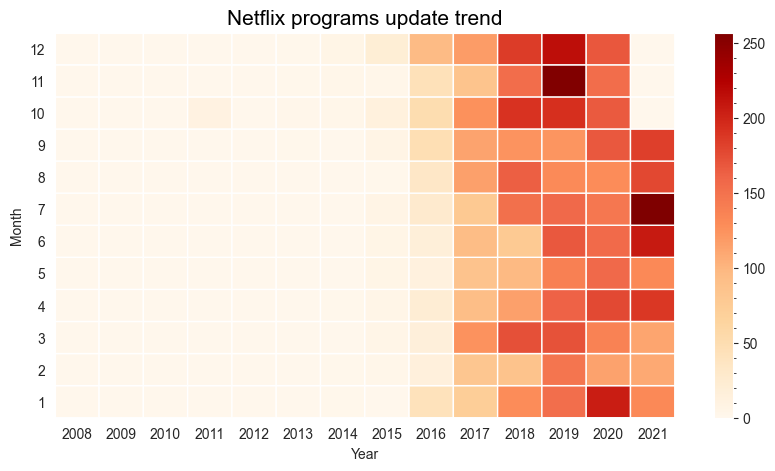

In [839]:
month_order = [1,2,3,4,5,6,7,8,9,10,11,12]

netflix_date = df.groupby('year_added')['month_added'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10,5))
plt.pcolor(netflix_date, cmap='OrRd', edgecolors='white', linewidths=1) # heatmap
plt.xticks(np.arange(0.5, len(netflix_date.columns), 1), netflix_date.columns)
plt.yticks(np.arange(0.5, len(netflix_date.index), 1), netflix_date.index)

plt.xlabel('Year', fontsize=10)
plt.ylabel('Month', fontsize=10)

plt.title('Netflix programs update trend', fontsize=15)
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=10) 
cbar.ax.minorticks_on()
plt.show()

Khi kết hợp xu hướng phát hành các chương trình trên Netflix theo tháng và năm, gia đoạn từ năm 2019, những tháng đầu năm có số lượng chương trình ít hơn, nhà sản xuất có thể cân nhắc để lựa chọn thời điểm phát hành phù hợp để thu hút được nhiều người xem hơn

#### Duration

Đối với cột Duration, nếu Type là Movie thì giá trị là số phút, còn nếu Type là TV Show thì giá trị là số mùa. Vì vậy, chúng ta sẽ phân tích riêng cho hai trường hợp này

In [840]:
# Spilt the data into 2 dataframe based on type
movie = df[df['type'] == 'Movie']
tv_show = df[df['type'] == 'TV Show']

##### Movie

In [841]:
# Change the duration of movie to int
movie['duration'] = movie['duration'].str.replace(' min', '').astype(int)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9972\3349623602.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['duration'] = movie['duration'].str.replace(' min', '').astype(int)


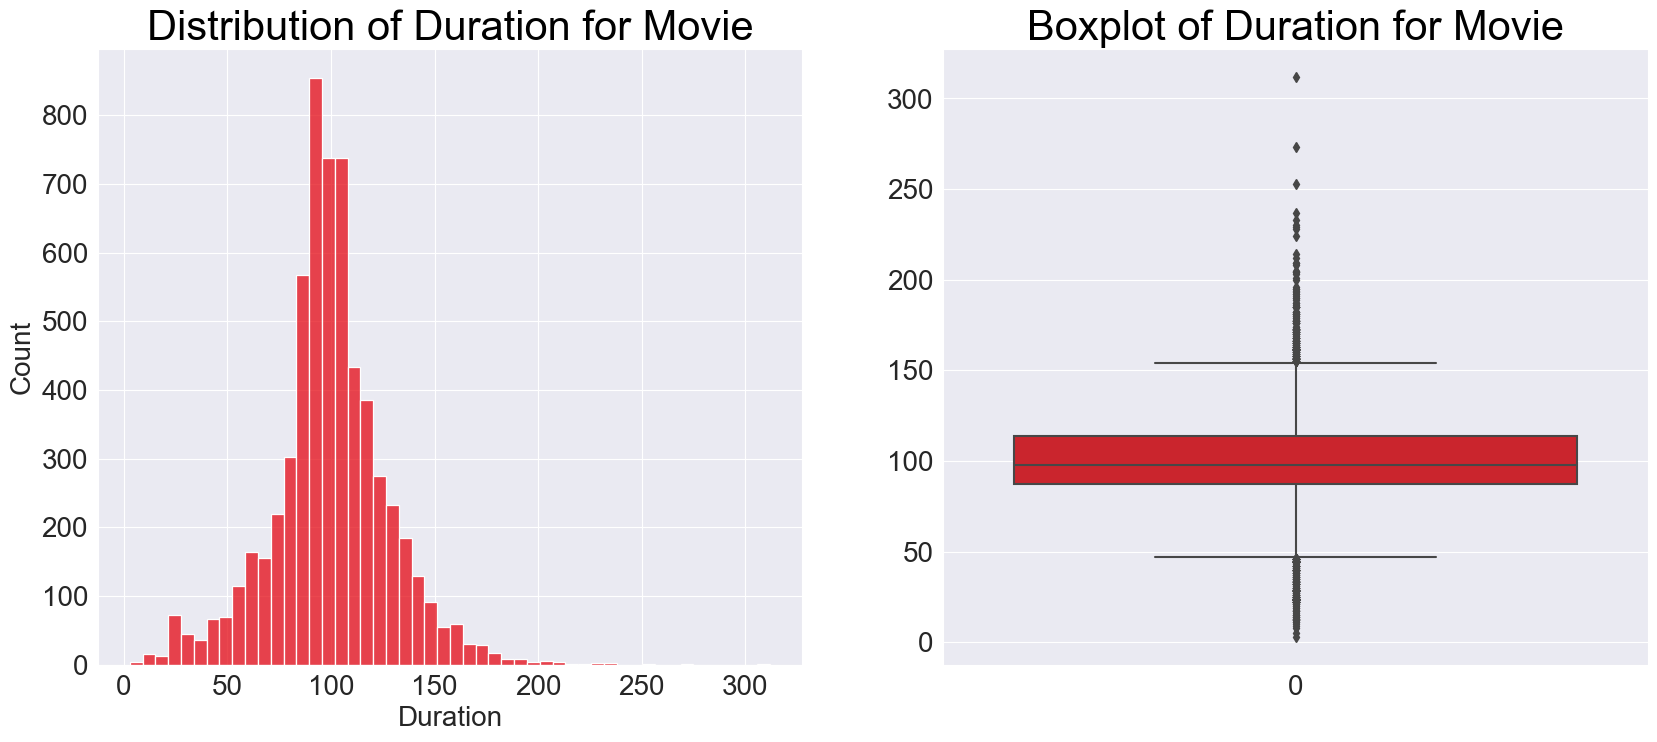

In [842]:
fig, ax = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,8)

sns.histplot(movie.duration, ax=ax[0], bins=50, color=custom_colors[3])

ax[0].set_title('Distribution of Duration for Movie', fontsize=30)

sns.boxplot(movie.duration, ax=ax[1], color=custom_colors[3])
ax[1].set_title('Boxplot of Duration for Movie', fontsize=30)

ax[0].set_xlabel('Duration', fontsize=20)
ax[0].set_ylabel('Count', fontsize=20)
ax[0].tick_params(axis='x', labelsize=20)
ax[0].tick_params(axis='y', labelsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Một bộ phim có thời lượng trung bình khoảng 75 - 110 phút, tuy nhiên, bên cạnh đó cũng có một số bộ phim có thời lượng lên đến 312 phút (5 tiếng 12 phút)

##### TV Show

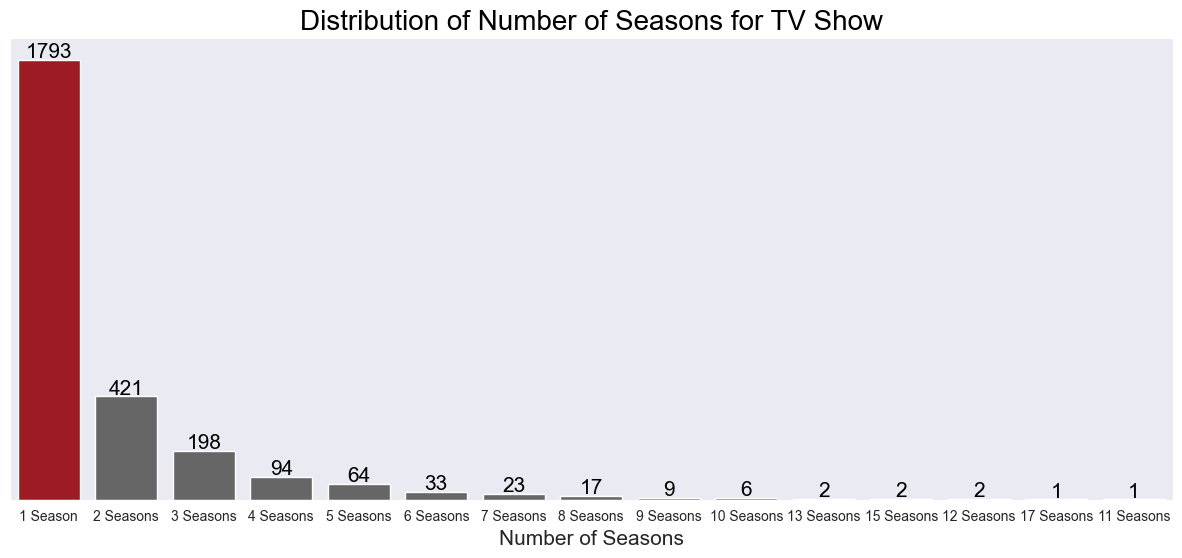

In [843]:
plt.figure(figsize=(15,6))
color_map3 = [custom_colors[1] for _ in range(16)]
color_map3[0] = custom_colors[2]
sns.countplot(data=tv_show, x='duration', palette=color_map3, order=tv_show['duration'].value_counts().index)

for i in range(15):
    count = tv_show['duration'].value_counts().values[i]
    plt.text(i, count+10, count, ha='center', fontsize=15)

plt.yticks([])
plt.ylabel('')
    
plt.xlabel('Number of Seasons', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)
plt.title('Distribution of Number of Seasons for TV Show', fontsize=20)
plt.show()

- Hầu hết các TV Show trên Netflix có một season
- Một số TV Show khác có 2-5 seasons, tuy nhiên, cũng có một số TV Show có đến 16 seasons, tuy nhiên số lượng này không quá nhiều

### Categorical data

#### Type

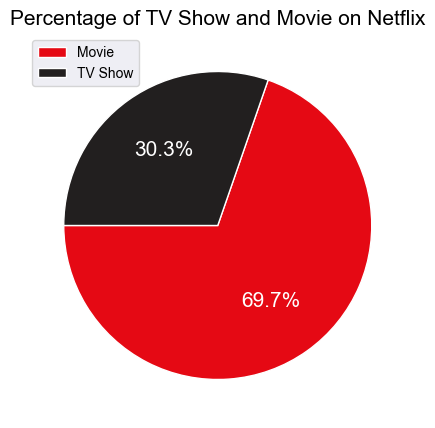

In [844]:
# Create pie chart for type
plt.figure(figsize=(5,5))
plt.pie(df['type'].value_counts(), labels=df['type'].value_counts().index, autopct='%1.1f%%', startangle=180, colors=[custom_colors[3], custom_colors[0]])
plt.title('Percentage of TV Show and Movie on Netflix', fontsize=15)

for text in plt.gcf().get_axes()[0].texts:
    text.set_color('white')
    text.set_size(15)

plt.legend(['Movie', 'TV Show'], loc='upper left')

plt.show()

- Gần 70% các chương trình trên Netflix là các phim, còn 30% còn lại là TV Shows

#### Rating

Cột Rating trong tập dữ liệu này là phân loại xếp hạng các chương trình trên Netflix, có 14 loại xếp hạng khác nhau. 

Một số ví dụ về ý nghĩa của các xếp hạng (TV-MA: chỉ dành cho người trưởng thành, TV-14: chỉ dành cho người trên 14 tuổi, TV-PG: chỉ dành cho trẻ em dưới 13 tuổi cần có sự hướng dẫn của phụ huynh,...)

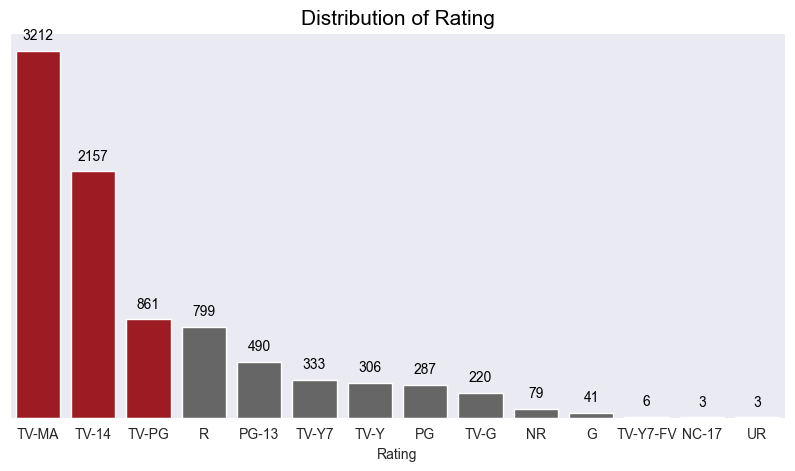

In [845]:
plt.figure(figsize=(10,5))
color_map4 = [custom_colors[1] for _ in range(22)]
color_map4[0] = color_map4[1] = color_map4[2] = custom_colors[2]

sns.countplot(data=df, x='rating', palette=color_map4, order=df['rating'].value_counts().index)

for i in range(len(df['rating'].value_counts().index)):
    count = df['rating'].value_counts().values[i]
    plt.text(i, count+100, s=f"{count}", horizontalalignment='center', fontsize=10)

plt.yticks([])
plt.ylabel('')

plt.xlabel('Rating', fontsize=10)
plt.title('Distribution of Rating', fontsize=15)
plt.xticks(fontsize=10)
plt.show()

- Các chương trình được phát hành trên Netflix chủ yếu là dành cho người trưởng thành (TV-MA), tiếp theo là dành cho người trên 14 tuổi. 
- Các nội dung dành cho trẻ em, đối tượng người xem chung tương đối ít hơn

Có thể thấy, đối tượng chính của Netflix là người trưởng thành và thanh thiếu niên

In [846]:
# Create list of rating, order by the number of rating descending
order = pd.DataFrame(df.groupby('rating')['show_id'].count().sort_values(ascending=False))
order = order.reset_index()
rating_order = list(order['rating'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_9972\148103397.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(mf.columns)


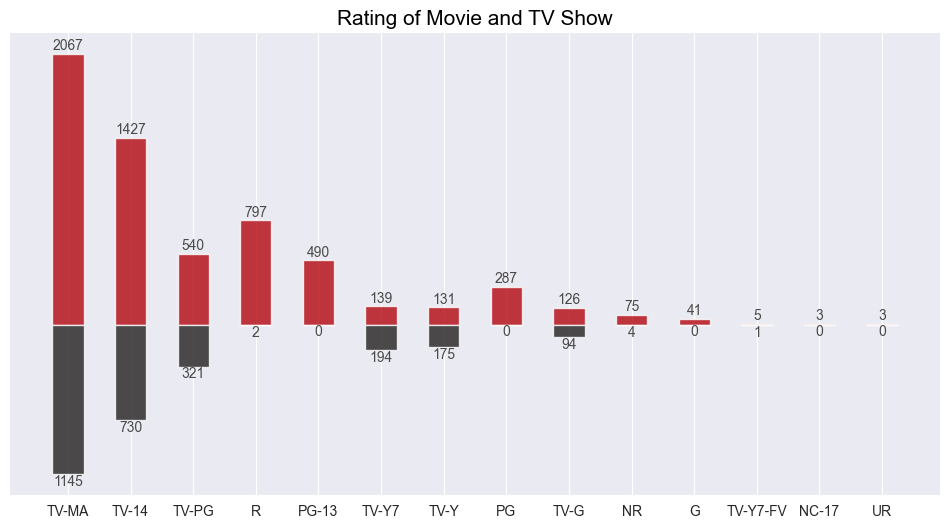

In [847]:
mf = df.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]

movie = mf.loc['Movie']
tv = - mf.loc['TV Show']

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(movie.index, movie, width=0.5, color='#b20710', alpha=0.8, label='Movie')
ax.bar(tv.index, tv, width=0.5, color='#221f1f', alpha=0.8, label='TV Show')
#ax.set_ylim(-35, 50)

# Annotations
for i in tv.index:
    ax.annotate(f"{-tv[i]}", 
                   xy=(i, tv[i] - 60),
                   va = 'center', ha='center',
                   color='#4a4a4a')   

for i in movie.index:
    ax.annotate(f"{movie[i]}", 
                   xy=(i, movie[i] + 60),
                   va = 'center', ha='center',
                   color='#4a4a4a')
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(mf.columns)
ax.set_yticks([])    

ax.legend().set_visible(False)

plt.title('Rating of Movie and TV Show', fontsize=15)

plt.show()

Phân tích kỹ hơn về Rating ở TV Show và Movie:
- Các phim trên Netflix sẽ có nhiều thể loại hơn, từ các phim dành cho trẻ em đến các phim dành cho người trưởng thành
- Đối với các chương trình TV Show, các thể loại ít hơn, bên cạnh các chương trình dành cho người trưởng thành, đối tượng của TV show là những người xem chung và trẻ em

#### Cast

Đối với cột Cast, dữ liệu được thu thập đã được gộp lại, tức là một chương trình có nhiều diễn viên tham gia và được gộp trong một dòng

In [848]:
# Calculate the number of cast in Netflix
cast = df.cast.str.split(', ', expand=True).stack().value_counts()
cast = cast.reset_index()
cast.columns = ['cast', 'count']
cast

,cast,count
0,Unknown,825
1,Anupam Kher,43
2,Shah Rukh Khan,35
3,Julie Tejwani,33
4,Takahiro Sakurai,32
...,...,...
36399,Song Young-kyu,1
36400,Kim Ho-jung,1
36401,Kim Hye-soo,1
36402,Annie Gonzalez,1


- Có hơn 33000 diễn viên tham gia vào các chương trình trên Netflix

Lưu ý: đã có một số lượng lớn dữ liệu về diễn viên bị thiếu và được xử lý thay thế bằng 'Unknown'.

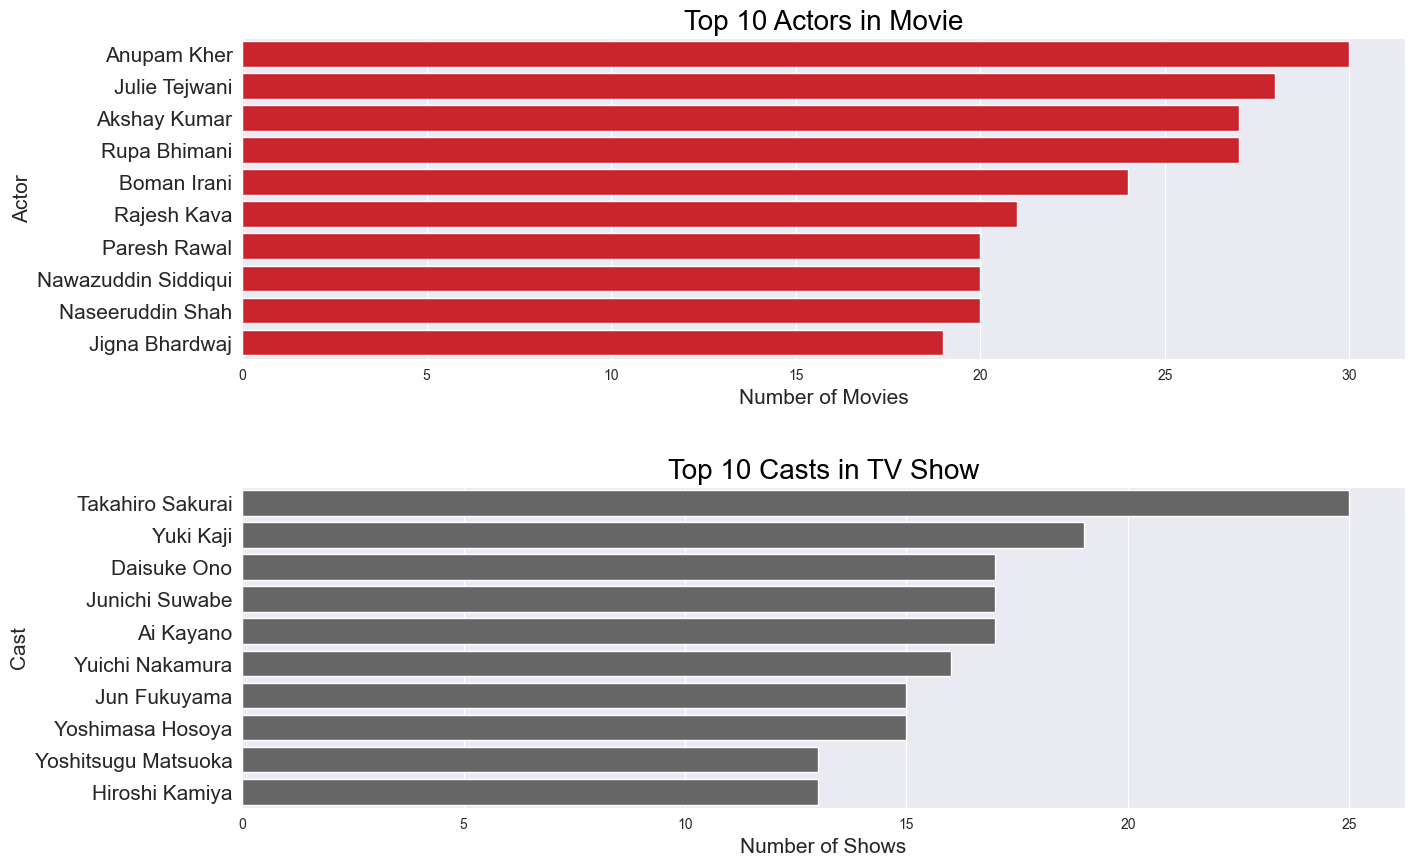

In [849]:
# create bar plot for top 10 actors in movie and tv show
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.barplot(x=movie_actor.values, y=movie_actor.index, color=custom_colors[3])
plt.title('Top 10 Actors in Movie', fontsize=20)
plt.xlabel('Number of Movies', fontsize=15)
plt.ylabel('Actor', fontsize=15)
plt.yticks(fontsize=15)

plt.subplots_adjust(hspace=0.4)

plt.subplot(2,1,2)
sns.barplot(x=tv_show_actor.values, y=tv_show_actor.index, color=custom_colors[1])
plt.title('Top 10 Casts in TV Show', fontsize=20)
plt.xlabel('Number of Shows', fontsize=15)
plt.ylabel('Cast', fontsize=15)
plt.yticks(fontsize=15)

plt.show()

#### Director

Tương tự với cột Cast, dữ liệu về Director cũng được gộp lại trong một dòng

In [850]:
director = df.director.str.split(', ', expand=True).stack().value_counts()
director = director.reset_index()
director.columns = ['director', 'count']
director

,director,count
0,Unknown,2624
1,Rajiv Chilaka,22
2,Jan Suter,21
3,Raúl Campos,19
4,Suhas Kadav,16
...,...,...
4989,Raymie Muzquiz,1
4990,Stu Livingston,1
4991,Joe Menendez,1
4992,Eric Bross,1


Có hơn 4633 đạo diễn sản xuất các chương trình trên Netflix

Lưu ý: đã có một số lượng lớn dữ liệu về diễn viên bị thiếu và được xử lý thay thế bằng 'Unknown'.

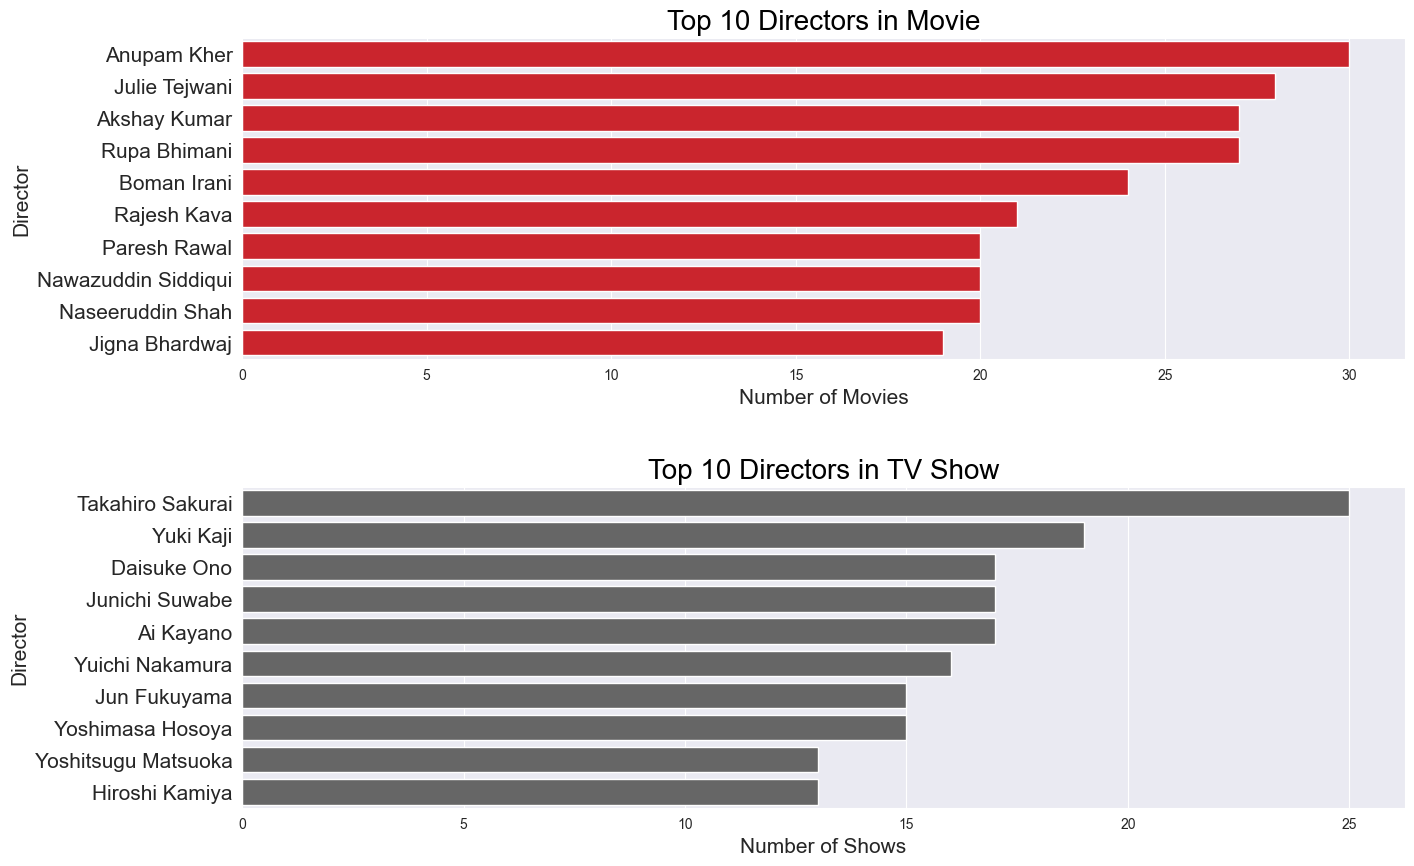

In [851]:
# create bar plot for top 10 actors in movie and tv show
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.barplot(x=movie_actor.values, y=movie_actor.index, color=custom_colors[3])
plt.title('Top 10 Directors in Movie', fontsize=20)
plt.xlabel('Number of Movies', fontsize=15)
plt.ylabel('Director', fontsize=15)
plt.yticks(fontsize=15)

plt.subplots_adjust(hspace=0.4)

plt.subplot(2,1,2)
sns.barplot(x=tv_show_actor.values, y=tv_show_actor.index, color=custom_colors[1])
plt.title('Top 10 Directors in TV Show', fontsize=20)
plt.xlabel('Number of Shows', fontsize=15)
plt.ylabel('Director', fontsize=15)
plt.yticks(fontsize=15)

plt.show()

#### Country

Tương tự như hai cột Cast và Director, dữ liệu về Country cũng được gộp lại trong một dòng

In [852]:
country = df.country.str.split(', ', expand=True).stack().value_counts()
country = country.reset_index()
country.columns = ['country', 'count']
country

,country,count
0,United States,3683
1,India,1046
2,Unknown,830
3,United Kingdom,803
4,Canada,445
...,...,...
123,Bermuda,1
124,Ecuador,1
125,Armenia,1
126,Mongolia,1


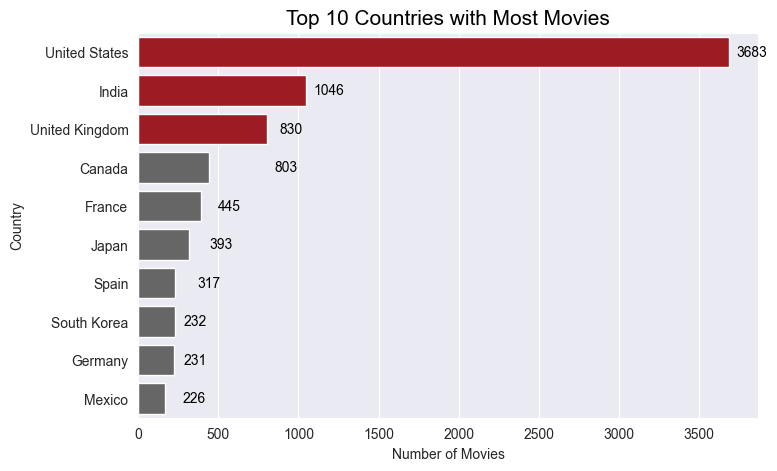

In [853]:
# create bar chart for countries and number of movies excluding the unknown country
plt.figure(figsize=(8,5))
sns.barplot(data=country[country['country'] != 'Unknown'].head(10), x='count', y='country', palette=color_map4)

plt.title('Top 10 Countries with Most Movies', fontsize=15)
plt.xlabel('Number of Movies', fontsize=10)
plt.ylabel('Country', fontsize=10)
for i in range(10):
    count = country['count'].values[i]
    plt.text(count+50, i, count, va='center', fontsize=10)
plt.show()

- Có hơn 120 quốc gia có các chương trình được phát hành trên Netflix. 
- Trong đó, Mỹ là quốc gia có số lượng chương trình được phát hành nhiều nhất, tiếp theo là Ấn Độ và Anh.

#### Listed_in

Listed_in là cột chứa các thể loại của các chương trình trên Netflix. Các dữ liệu ở cột này cũng được gộp lại trong một dòng

In [854]:
# create  new dateframe that show the category and the number of category, also the type of category
category = df.listed_in.str.split(', ', expand=True).stack().value_counts()
category = category.reset_index()
category.columns = ['category', 'count']

In [855]:
# Add type of category to the dataframe
movie = df[df['type'] == 'Movie']
category['type'] = category['category'].apply(lambda x: 'Movie' if x in movie['listed_in'].str.split(', ', expand=True).stack().unique() else 'TV Show')

In [856]:
category['type'].value_counts()

type
TV Show    22
Movie      20
Name: count, dtype: int64

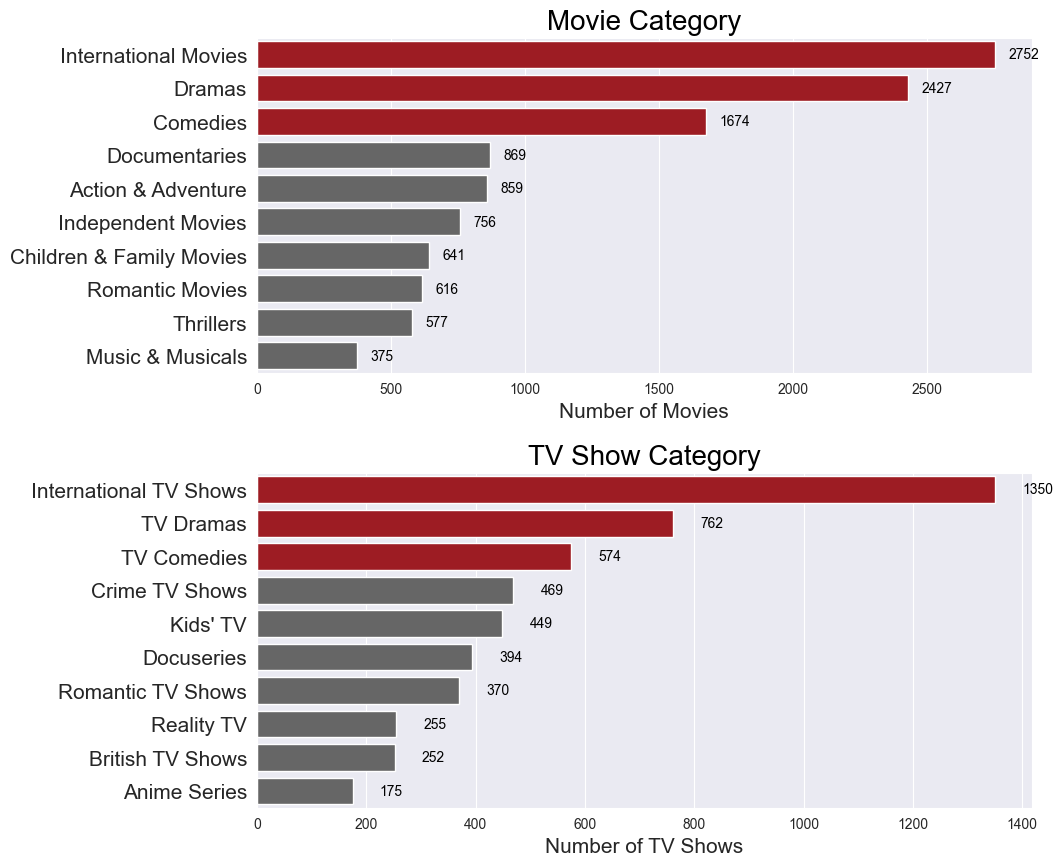

In [857]:
# Create bar chart for category for each type
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.barplot(data=category[category['type'] == 'Movie'].head(10), x='count', y='category', palette=color_map4)
plt.title('Movie Category', fontsize=20)
plt.xlabel('Number of Movies', fontsize=15)
plt.ylabel('')
plt.yticks(fontsize=15)

for i in range(10):
    count = category[category['type'] == 'Movie']['count'].values[i]
    plt.text(count+50, i, count, va='center', fontsize=10)

plt.subplots_adjust(hspace=0.3)

plt.subplot(2,1,2)
sns.barplot(data=category[category['type'] == 'TV Show'].head(10), x='count', y='category', palette=color_map4)
plt.title('TV Show Category', fontsize=20)
plt.xlabel('Number of TV Shows', fontsize=15)
plt.ylabel('')
plt.yticks(fontsize=15)

for i in range(10):
    count = category[category['type'] == 'TV Show']['count'].values[i]
    plt.text(count+50, i, count, va='center', fontsize=10)

plt.show()

- Có tất cả 42 thể loại chương trình trên Netflix.
- Trong đó, phim có 20 thể loại, TV show có 22 thể loại.
- Các chương trình International Movies chiếm tỉ lệ cao nhất, tiếp theo là Dramas và Comedies.

### Other text data

Đối với hai cột title và Description, ta sử dụng WordCloud để phân tích các xu hướng xuất hiện từ trong các tiêu đề và mô tả

#### Title

In [858]:
from wordcloud import WordCloud

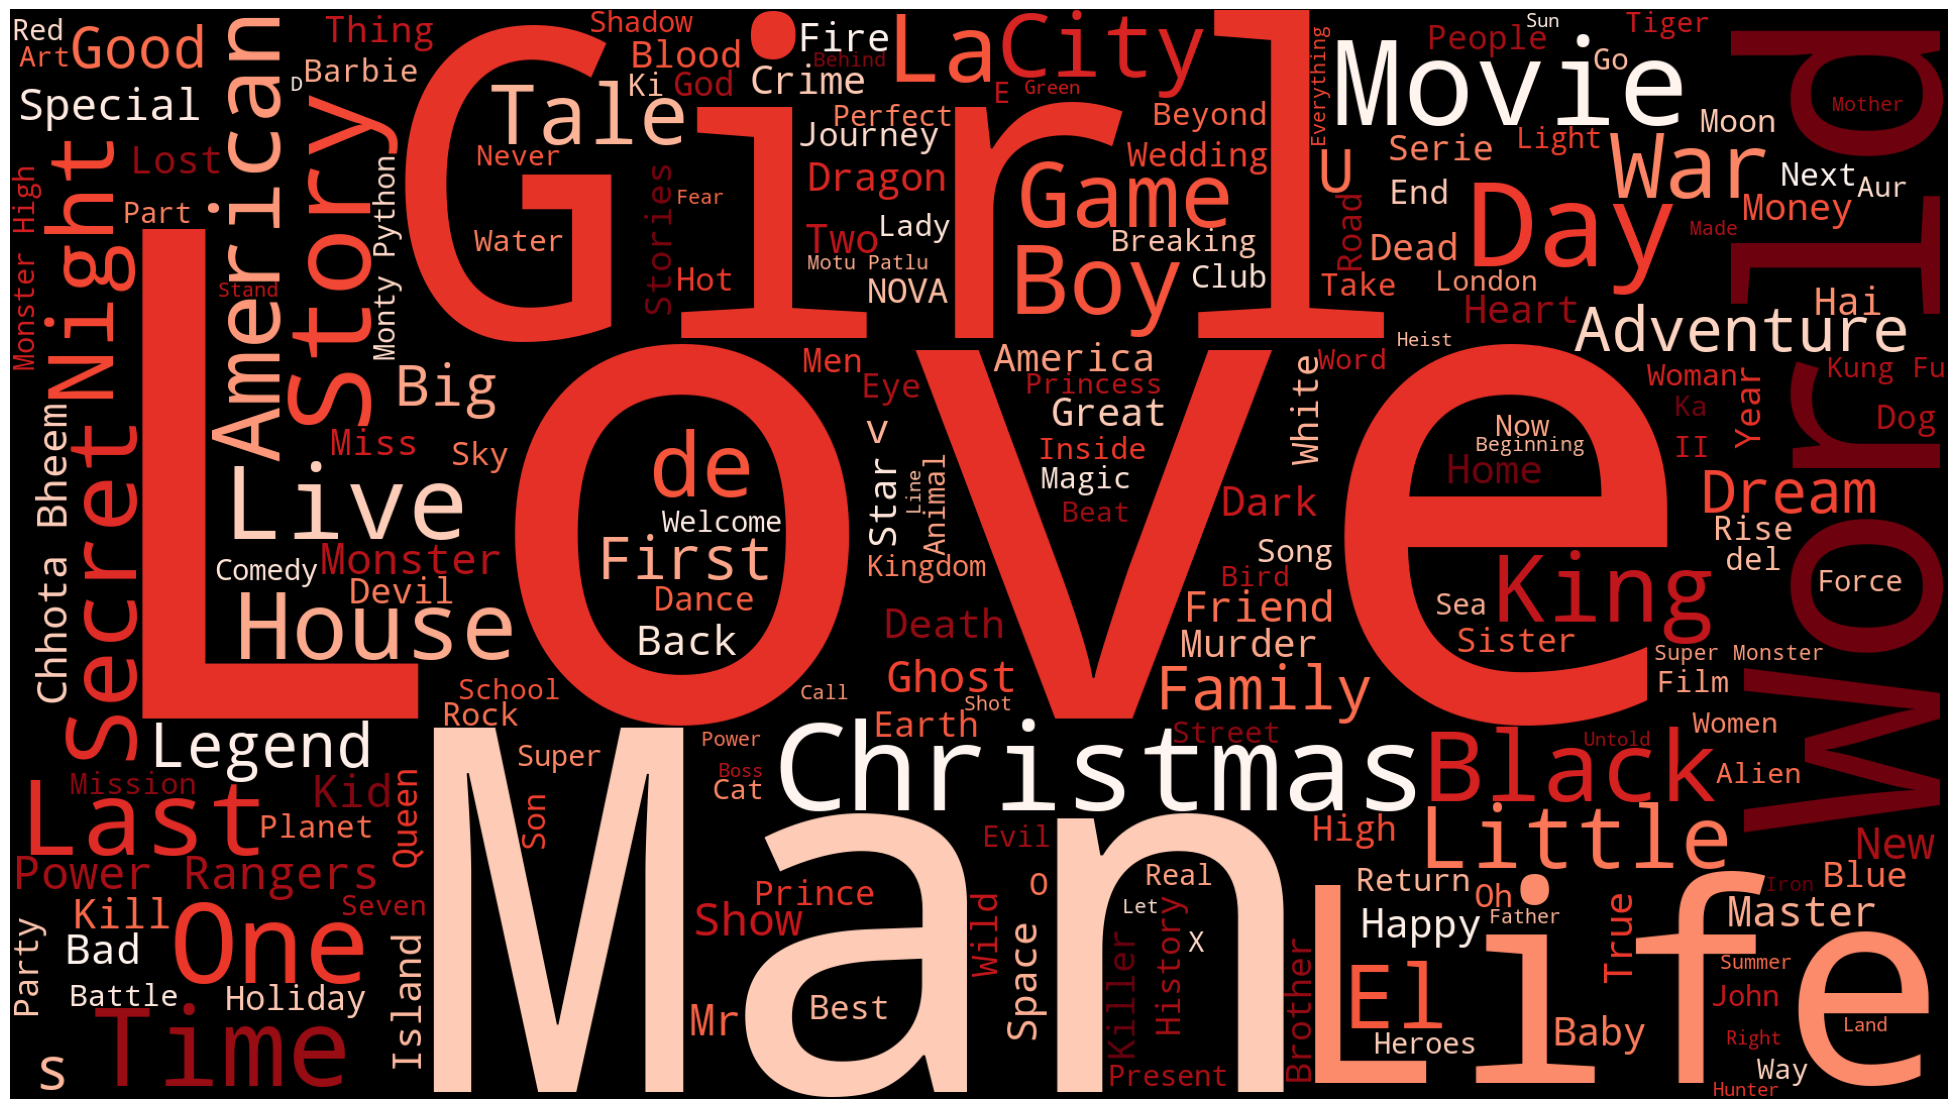

In [859]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080,
                          colormap='Reds',
                         ).generate(" ".join(df.title))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

#### Description

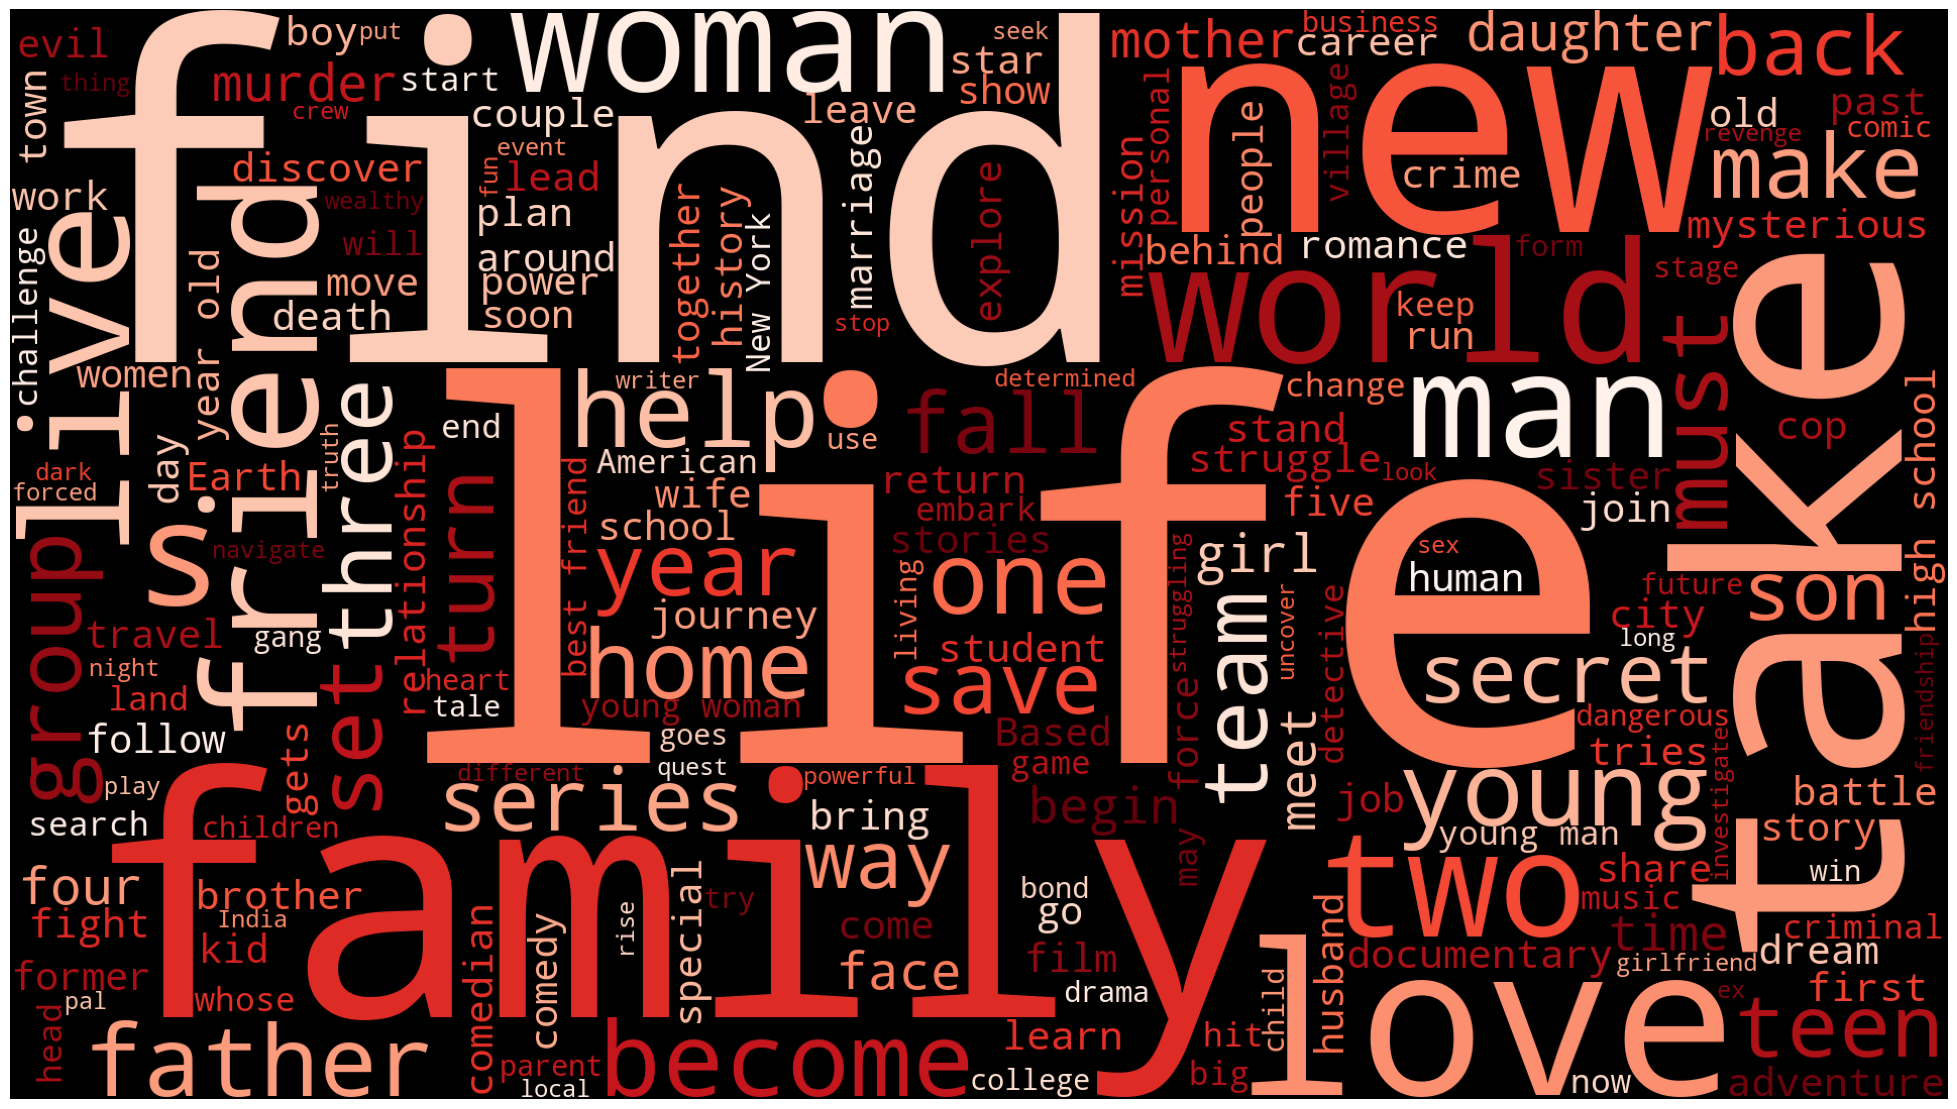

In [860]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080,
                            colormap='Reds',
                         ).generate(" ".join(df.description))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()